# Lab1 - Scikit-learn
Author: Michael Adelure

## Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?
2. For each task (classification and regression), which model performs best on the validation data using two principal components?
3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?
4. Do any of the models underfit or overfit? Provide examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Function definitions

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def get_classifier_accuracy(model, X, y):
    '''Calculate train and validation accuracy of classifier (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training accuracy, validation accuracy
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y):
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

In [4]:
from sklearn.decomposition import PCA

def get_n_principal_components(X, n=2):
    '''Extracts n principal componets from feature matrix X using sklearn PCA.
        X (pandas.DataFrame): A feature matrix
        n (int): number of principal components
        
        returns: feature matrix with n columns as numpy.array
    '''
    
    model = PCA(n_components=n)
    model.fit(X)
    X_PCA = model.transform(X)
    return X_PCA

## Classification

Using yellowbrick spam - classification  
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

The goal is to compare `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` classification performance on a validation set with full features and first two principal components.

### Load data

Load the spam data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.


In [5]:
from yellowbrick.datasets import load_spam

X, y = load_spam()
print('X.shape={}, type(X)={}'.format(X.shape, type(X)))
print('y.shape={}, type(y)={}'.format(y.shape, type(y)))

X_2D = get_n_principal_components(X, n=2)
print('X_2D.shape={}, type(X_2D)={}'.format(X_2D.shape, type(X_2D)))

X.shape=(4600, 57), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(4600,), type(y)=<class 'pandas.core.series.Series'>
X_2D.shape=(4600, 2), type(X_2D)=<class 'numpy.ndarray'>


/Users/pauc/miniconda3/envs/ensf-ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Train and evaluate models

1. Import `LogisticRegression` and `RandomForestClassifier` from sklearn
2. Instantiate models `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_classifier_accuracy()` using all features, i.e. `X`.
    - Call `get_classifier_accuracy()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **3 decimal places**.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = [LogisticRegression(max_iter=2000), 
        RandomForestClassifier(random_state=88)]

for model in models:
    train, val = get_classifier_accuracy(model, X, y)
    print("{} n_features={}, train_score={:.3f}, validation_score={:.3f}".format(model.__class__.__name__,
                                                                                X.shape[-1],
                                                                                train,
                                                                                val))
    train, val = get_classifier_accuracy(model, X_2D, y)
    print("{} n_features={}, train_score={:.3f}, validation_score={:.3f}".format(model.__class__.__name__,
                                                                                X_2D.shape[-1],
                                                                                train,
                                                                                val))



LogisticRegression n_features=57, train_score=0.934, validation_score=0.917
LogisticRegression n_features=2, train_score=0.729, validation_score=0.725
RandomForestClassifier n_features=57, train_score=0.999, validation_score=0.944
RandomForestClassifier n_features=2, train_score=0.999, validation_score=0.771


### Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the lables in `y` as `hue`.

Label x- and y-axis and add a title.

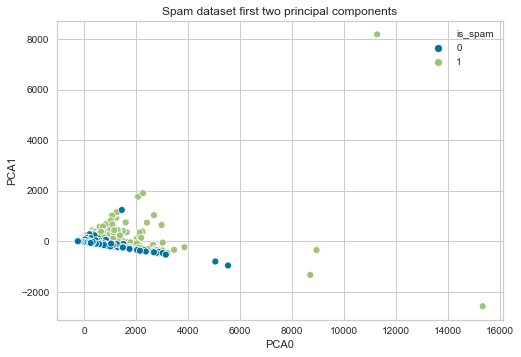

In [7]:
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y);
plt.xlabel('PCA0');
plt.ylabel('PCA1');
plt.title('Spam dataset first two principal components');

## Regression

Using yellowbrick energy - regression  
https://www.scikit-yb.org/en/latest/api/datasets/energy.html

The goal is to compare `LinearRegression()` and `RandomForestRegressor(random_state=88)` regression performance on a validation set with full features and first two principal components.

### Load data

Load the energy data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.

In [8]:
from yellowbrick.datasets import load_energy

X, y = load_energy()
print('X.shape={}, type(X)={}'.format(X.shape, type(X)))
print('y.shape={}, type(y)={}'.format(y.shape, type(y)))

X_2D = get_n_principal_components(X, n=2)
print('X_2D.shape={}, type(X_2D)={}'.format(X_2D.shape, type(X_2D)))

X.shape=(768, 8), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(768,), type(y)=<class 'pandas.core.series.Series'>
X_2D.shape=(768, 2), type(X_2D)=<class 'numpy.ndarray'>


### Train and evaluate models

1. Import `LinearRegression` and `RandomForestRegressor` from sklearn
2. Instantiate models `LinearRegression()` and `RandomForestRegressor(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_regressor_mse()` using all features, i.e. `X`.
    - Call `get_regressor_mse()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **1 decimal place**.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression(), RandomForestRegressor(random_state=88)]

for model in models:
    train, val = get_regressor_mse(model, X, y)
    print("{} n_features={}, train_score={:.1f}, validation_score={:.1f}".format(model.__class__.__name__,
                                                                                X.shape[-1],
                                                                                train,
                                                                                val))
    train, val = get_regressor_mse(model, X_2D, y)
    print("{} n_features={}, train_score={:.1f}, validation_score={:.1f}".format(model.__class__.__name__,
                                                                                X_2D.shape[-1],
                                                                                train,
                                                                                val))

LinearRegression n_features=8, train_score=8.0, validation_score=10.3
LinearRegression n_features=2, train_score=22.2, validation_score=19.6
RandomForestRegressor n_features=8, train_score=0.0, validation_score=0.2
RandomForestRegressor n_features=2, train_score=9.6, validation_score=8.6


### Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the values in `y` as `hue` and `size`.

Label x- and y-axis and add a title.

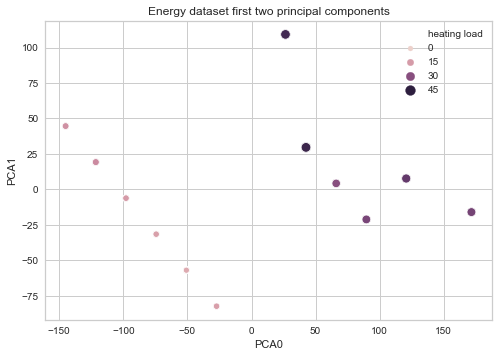

In [10]:
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y, size=y);
plt.xlabel('PCA0');
plt.ylabel('PCA1');
plt.title('Energy dataset first two principal components');

## Observations/Interpretation

### Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?

**Classification:**  
RandomForestClassifier performs better. It has a validation accuracy of 0.944 which is higher than LogisticRegression's 0.917.

**Regression:**
RandomForestRegressor performs better. It has a validation mean-squared error of 0.2 which is lower than LinearRegression's 10.3.


2. For each task (classification and regression), which model performs best on the validation data using two principal components?

**Classification:**
RandomForestClassifier performs better. It has a validation accuracy of 0.771 which is very slightly higher than LogisticRegression's 0.725.

**Regression:**
RandomForestRegressor performs better. It has a validation mean-squared error of 8.6 which is lower than LinearRegression's 19.6.

3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?

**Classification:**
LogisticRegression performs significantly worse with only two principal components 0.725 vs. 0.917.
RandomForestClassifier performs significantly worse with only two principal components 0.771 vs. 0.944.

**Regression:**
Both LinearRegression and RandomForestRegressor perform worse with only two PCA components.

4. Do any of the models underfit or overfit? Provide examples.
**Underfitting** is characterized by comparable train and validation set scores that are relatively far from optimal. An example would be LogisticRegression with PCA. Both train (0.729) and test (0.725) scores are comparable, but away from the ideal value of 1.0. This model might not be complex enough to capture the essence of the data.

**Overfitting** is characterized by a large discrepancy between train and validation set scores.
An example would be RandomForestClassifier with PCA. With PCA, train (0.999) score is sginificantly higher than validation (0.771) score. An indication that the model is too complex and does not generalize well. Regularization would help.

### Conclusion
One conclusion I can draw is, that it is necessary to look at both traning and validation scores to have a good idea about under and overfitting. This was stressed in the lecture, but now I saw it first hand.

It is expected that with providing less information, i.e. using only two PCA features versus using all features, models would perfrom worse. This was seen in these experiments. 


## Reflection

Just seeing the metric numbers makes me want to see more. Especially, in the classification task using PCA, classes seem to overlap alot. How does the classifier still achieve 0.7 accuracy?

Plotting the decision boundary might help (see below).

Further, I was wondering about regression MSE. I see that some models do better, but what would be good performance? Is an MSE of 10 good or bad for this application? This is something I would like to learn more about.

I remembered that looking at residuals might be useful, so I included yellowbrick residual plot below.

### Logistic Regression decision boundary
Logistic regression being a linear classifier, I wonder how it does so well with 2 PCA components.

Plotting the decision boundary might shed some light.

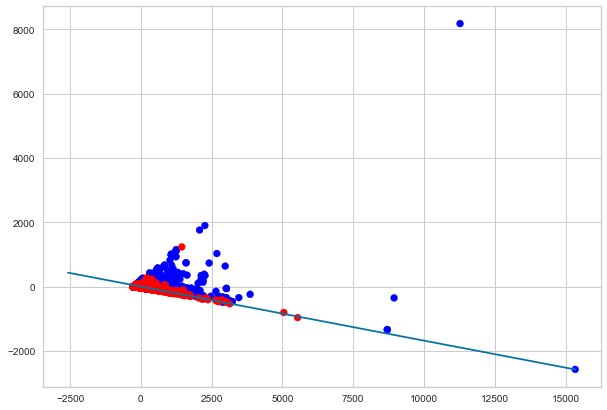

In [11]:
#Reference: https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot/22356267#22356267

X, y = load_spam()

pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)


# use LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_2D, y)

# Coefficient of the features in the decision function. (from theta 1 to theta n)
parameters = log_reg.coef_[0]
# Intercept (a.k.a. bias) added to the decision function. (theta 0)
parameter0 = log_reg.intercept_

# Plotting the decision boundary
fig = plt.figure(figsize=(10,7))
x_values = [np.min(X_2D ), np.max(X_2D)]
# calcul y values
y_values = np.dot((-1./parameters[1]), (np.dot(parameters[0],x_values) + parameter0))
colors=['red' if l==0 else 'blue' for l in y]
plt.scatter(X_2D[:, 0], X_2D[:, 1], label='Logistics regression', color=colors)
plt.plot(x_values, y_values, label='Decision Boundary')

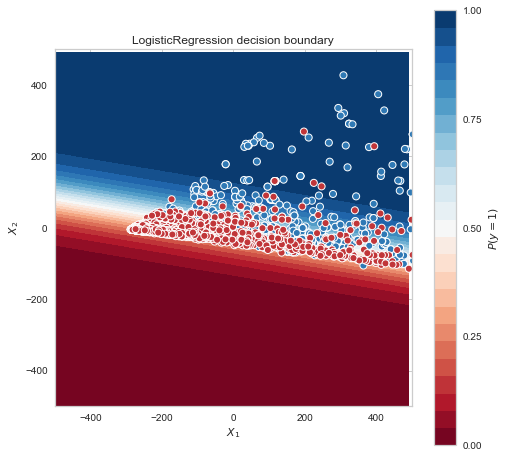

In [12]:
#Reference:
# https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

max_val=500

pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)


# use LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_2D, y)

xx, yy = np.mgrid[-max_val:max_val:10, -max_val:max_val:10]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_2D[:,0], X_2D[:, 1], c=y.values, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(title='LogisticRegression decision boundary',
        aspect="equal",
       xlim=(-max_val, max_val), ylim=(-max_val, max_val),
       xlabel="$X_1$", ylabel="$X_2$");

### RandomForestClassifier decision boundary
For completeness, the RandomForestClassifier decision boundary.

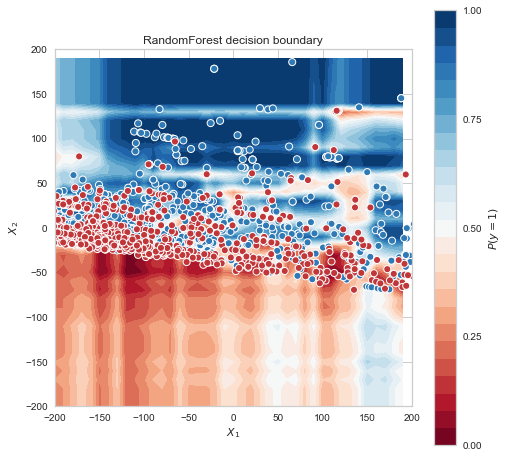

In [13]:
#Reference:
# https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

X, y = load_spam()

max_val=200

pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)


# use LogisticRegression
clf = RandomForestClassifier(random_state=88)
clf.fit(X_2D, y)

xx, yy = np.mgrid[-max_val:max_val:10, -max_val:max_val:10]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_2D[:,0], X_2D[:, 1], c=y.values, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(title='RandomForest decision boundary',
        aspect="equal",
       xlim=(-max_val, max_val), ylim=(-max_val, max_val),
       xlabel="$X_1$", ylabel="$X_2$");

### Regression residual and prediction error plots

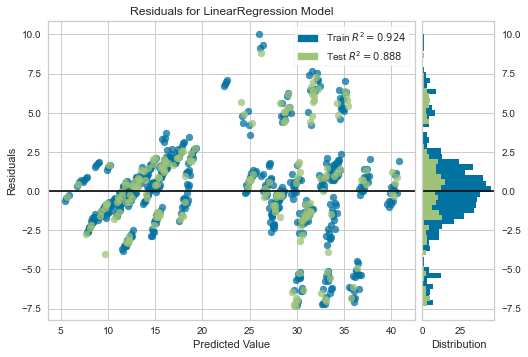

In [14]:
from yellowbrick.regressor import ResidualsPlot

X, y = load_energy()
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=956)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure